<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/Retail_Sales_Prediction/blob/main/Mrutyunjaya_Sahoo_Regression_capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **RETAIL SALES PREDICTION**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member-** MRUTYUNJAYA SAHOO


# **Project Summary -**

Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitior’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.

After understanding the data and getting variables, we first gathered and clean the data, and handled the null values and finally for getting better results we merged two datasets on inner join after that we have also typecasted the needed features into required format in order to visualize them properly. We performed EDA analysis of  different types of graphs by taking diffrent features and we gathered many good insights from it that helped us to make future decisions in implementing different ML Models .Then using further Feature Engineering we saw heatmap of different features. Under the umbrella of feature engineering we have also defined two codes for outliers detection and outliers treatment with the help of IQR technique and capped all the outliers of continous features in 25-75 percentile. Also, we have noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings). So, we have encoded them into numericals using One-Hot Encoding technique as they were unordered in nature.

At last we splited the dataset into training and testing sets. Next, we choose various linear and non linear supervised machine learning algorithms and use the training data to train the model. Finally, we evaluated the model's performance on the testing data to see how well it is able to predict the sales for the real time data. For this task we used many machine learning algorithms, including linear regression,random forests. In the beginning as our data is not perfectly linearly dependent , we have achieved r2 score of 0.95 even after using regularization techniques i.e Lasso, Ridge in linear regression model. We knew that complex model do not have underlying statistical assumptions so we were expecting more significant results in higher comlex model. 

# **GitHub Link -**

https://github.com/sahoomrutyunjaya12345/Retail_Sales_Prediction.git

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
rossmann_df = pd.read_csv("/content/drive/MyDrive/REGRESSION CAPSTONE PROJECT/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/REGRESSION CAPSTONE PROJECT/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look of rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Dataset First Look of Store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info of rossmann_df
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info of store_df
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset duplicate value counts of rossmann_df 
len(rossmann_df[rossmann_df.duplicated()])

0

In [ ]:
# Dataset duplicate value counts of store_df
len(store_df[store_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count rossmann_df
rossmann_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
#  Missing Values/Null Values Count of store_df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:>

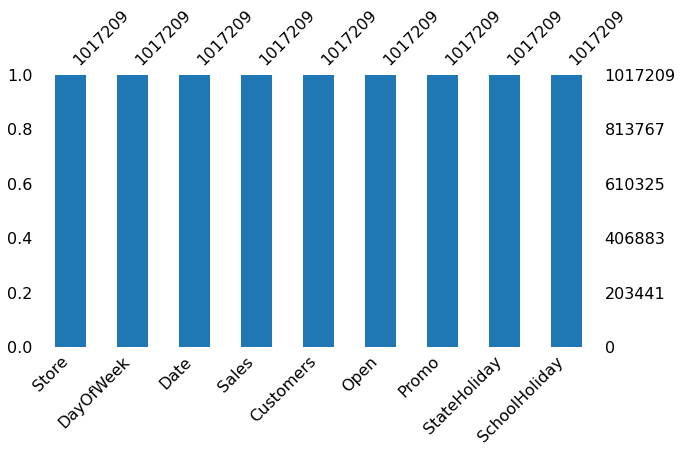

In [ ]:
# Visualizing the missing values
msno.bar(rossmann_df,figsize=(10,5), color="tab:blue")

<AxesSubplot:>

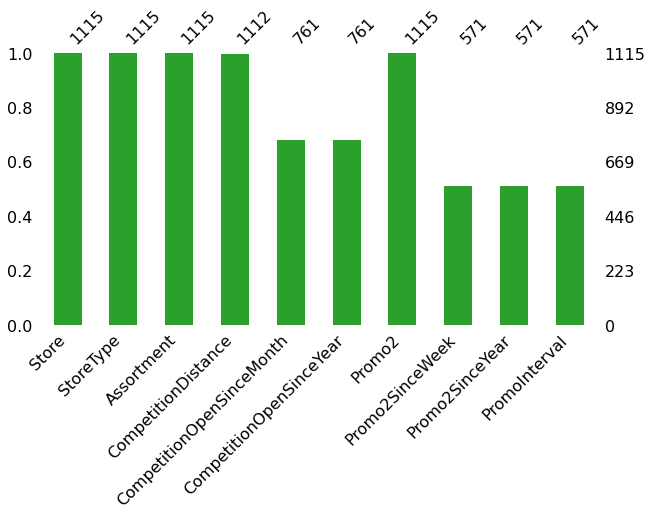

In [ ]:
# Visualizing the missing values
msno.bar(store_df,figsize=(10,5), color="tab:green")

### What did you know about your dataset?

From above operation we understand about these datasets such as

1. **rossmann dataset** have **1017209 rows and 9 columns** and it doesn't have any null values.
2. **store dataset** have **1115 rows and 10 columns** and **store dataset** have null values in total **six features** viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval.
3. There are ** no duplicate** values present in both **rossmann and store** datasets. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
rossmann_df.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
store_df.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

## Data fields:

1. Id - an Id that represents a (Store, Date) duple within the test set

2. Store - a unique Id for each store

3. Sales - the turnover for any given day (this is what you are predicting)

4. Customers - the number of customers on a given day

5. Open - an indicator for whether the store was open: 0 = closed, 1 = open

6. StateHoliday - indicates a state holiday.

7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

8. StoreType - differentiates between 4 different store models: a, b, c, d

9. Assortment - describes an assortment level: a = basic, b = extra, c = extended

10. CompetitionDistance - distance in meters to the nearest competitor store

11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

12. Promo - indicates whether a store is running a promo on that day

13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in rossmann_df.columns:
  print("The Unique Values of', i, 'are:", rossmann_df[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [ ]:
# Check Unique Values for each variable.
for i in store_df.columns:
  print("The Unique Values of', i, 'are:", store_df[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', i, 'are: ['a' 'c' 'b']
The Unique Values of', i, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
rossmann_df.isnull().sum(),  rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


(Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64, None)

In [ ]:
# Checking null values for store dataset
store_df.info(),  store_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


(None, Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64)

In [ ]:
# filling all null values of store dataset with 0

store_df.fillna({"CompetitionDistance":0},inplace=True)
store_df.fillna({"CompetitionOpenSinceMonth":0},inplace=True)
store_df.fillna({"CompetitionOpenSinceYear":0},inplace=True)
store_df.fillna({"Promo2SinceWeek":0},inplace=True)
store_df.fillna({"Promo2SinceYear":0},inplace=True)
store_df.fillna({"PromoInterval":0},inplace=True)

In [ ]:
# Removing duplicate value from both dataset if any
rossmann_df.duplicated().sum()
rossmann_df.drop_duplicates(inplace=True)

store_df.duplicated().sum()
store_df.drop_duplicates(inplace=True)

In [ ]:
# merging two dataset using inner join
final_dataset=pd.merge(rossmann_df,store_df,on = "Store" ,how="inner")
final_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
# changing dtype into required format from final the datasets
final_dataset["Date"]= pd.to_datetime(final_dataset["Date"],format="%Y/%m/%d")
final_dataset["CompetitionDistance"]= final_dataset["CompetitionDistance"].astype(int)
final_dataset["CompetitionOpenSinceMonth"]= final_dataset["CompetitionOpenSinceMonth"].astype(int)
final_dataset["CompetitionOpenSinceYear"]= final_dataset["CompetitionOpenSinceYear"].astype(int)
final_dataset["Promo2SinceWeek"]= final_dataset["Promo2SinceWeek"].astype(int)
final_dataset["Promo2SinceYear"]= final_dataset["Promo2SinceYear"].astype(int)

In [ ]:
final_dataset.info(),final_dataset.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

(None, (1017209, 18))

### What all manipulations have you done and insights you found?

We Checked the null values in both rossmann_df dataset but there is no null values and store_df dataset has some  columns have null values.So we replaced all null values with 0 and after replacing the null values we merged the two datset and also changed the data type of some columns to as per date time and int, for our better understanding . When we are going to check different featues relation between them and visualize them with some charts it will give us a meaningfull and a clear outlook of it. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1: Sales vs Frequency

Text(0.5, 1.0, 'Density distribution of Sales')

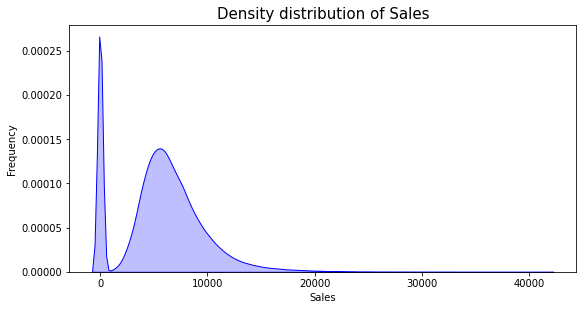

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(final_dataset["Sales"], color="Blue",shade=True)
plt.title('Density distribution of Sales',size = 15)

##### 1. Why did you pick the specific chart?

To Check the frequency of sales happening over this density distribution graph 

##### 2. What is/are the insight(s) found from the chart?

Here from this graph we found average stores are rightly skewed .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We saw from this density distribution graph we found that many stores are located in perfectly and also the sales are average, yes to sustain be competitive.

##  Chart - 2: Customers vs Frequency

Text(0.5, 1.0, 'Density distribution of Customers')

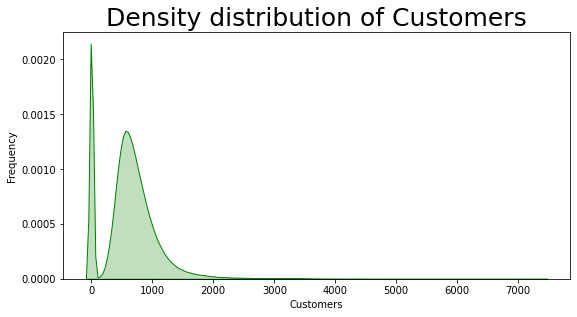

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(final_dataset["Customers"], color="green", shade = True)
plt.title('Density distribution of Customers',size = 25)

##### 1. Why did you pick the specific chart?

From this density distribution graph based on customer we found how customers are visting to the store.

##### 2. What is/are the insight(s) found from the chart?

From this customer distribution graph we understand average customers are visting to store is 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We saw from this frequency distribution graph on customer we found that there is postive response from customer as the data showinng average customers are 1000. so we understand to be more profit we have to take some hard decision to improve our customer.

## Chart - 3: DayOfWeek vs Sales


<Figure size 1152x576 with 0 Axes>

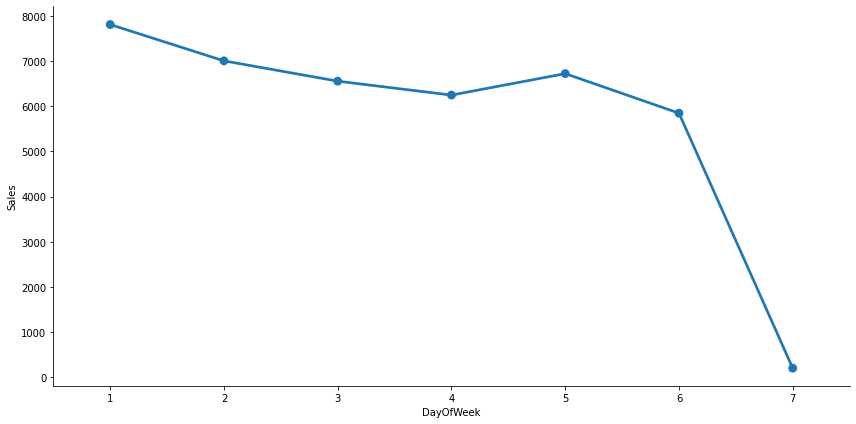

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(16,8))
sns.factorplot(x="DayOfWeek" ,y = "Sales" , data=final_dataset, kind="point", aspect=2,size=6)

##### 1. Why did you pick the specific chart?

From this graph we understand Sales of every day in a week

##### 2. What is/are the insight(s) found from the chart?

From this plot between Sales and dayofweek,we understand that sales are high on opening days but gradually decreasing and shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on saturday and  sales on Sunday is almost near to Zero as on sunday maximum stores are closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes from this we can increase our sales on the day where sales are high by taking different competitive methods. 

## Chart - 4: Open vs Sales

   Open       Sales
0     0           0
1     1  5873180623


<AxesSubplot:xlabel='Open', ylabel='Sales'>

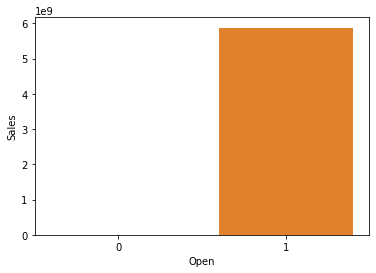

In [ ]:
# Chart - 5 visualization code
result=final_dataset.groupby(['Open'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'Open', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

To understand the sales when store's are open and closed.

##### 2. What is/are the insight(s) found from the chart?

yes when stores are closed there is no sales but when store's are open it's high in sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

from this count plot we finally understand how exactly sales are, so we can improve according to that.

## Chart - 5: Assortment vs Sales

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

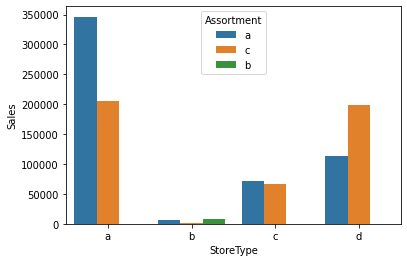

In [ ]:

Assort_sale=final_dataset.groupby(['StoreType','Assortment'],as_index=False).agg({'Sales':'count'})
sns.barplot(x='StoreType',y='Sales',hue='Assortment',data=Assort_sale)

##### 1. Why did you pick the specific chart?

To understand what type of assortment is sold in every store.

##### 2. What is/are the insight(s) found from the chart?


from this bar plot we understand:
Store type a has a and c type assortment,
Store type b has a and b type assortment,
Store type c has a and c type assortment,
Store type d has a and c type assortment.
Assortment type a is sold more which means their demand is high followed by type c,
b has the least sales which might mean they are high quality product and also they are available only in store type b.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot givees us  details about which type of assortment is highly sold in which type of store.

## Chart - 6: Customers vs Sales

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

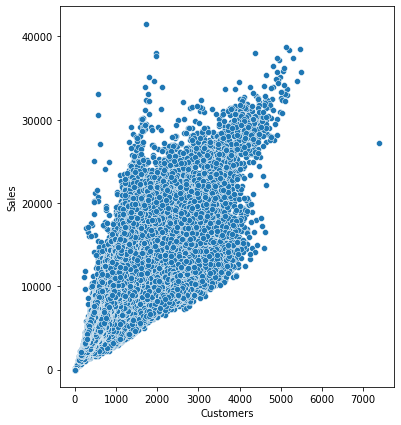

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(6,7))
sns.scatterplot(final_dataset['Customers'],final_dataset['Sales'])

##### 1. Why did you pick the specific chart?

We chose scatter plot because we wanted to plot the relationship between the number of customers visiting the store and the total sales.They are useful for identifying outliers in the data as well.

##### 2. What is/are the insight(s) found from the chart?

This scatter plot shows a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows in a linearly trend between customers and sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly proportional to each other and are highly correlated. It can help businesses to promote their strategies using marketing campaigns, advertisements to attract more customers ultimately increasing up the sales.

## Chart -7: Promo Vs Sales

<AxesSubplot:>

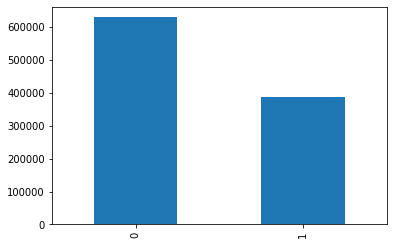

In [ ]:
final_dataset.Promo.value_counts().plot.bar()

Text(0.5, 0, 'Promo')

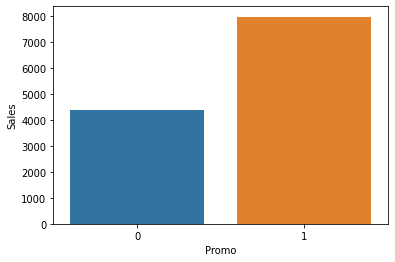

In [ ]:
promo=final_dataset.groupby(['Promo'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo.index, y = promo['Sales'])
plt.xlabel('Promo')


Text(0.5, 0, 'Promo2')

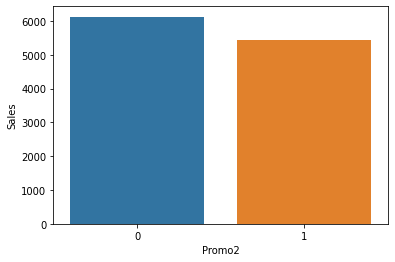

In [ ]:
promo2=final_dataset.groupby(['Promo2'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo2.index, y = promo2['Sales'])
plt.xlabel('Promo2')

##### 1. Why did you pick the specific chart?

To Understand the promotion of sales

##### 2. What is/are the insight(s) found from the chart?

From this barplot between promo vs sales gives us there is promotion occurs for sales to be incresing but in promo2 vs sales there is no promotion occurs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This detail information will give us the better idea of how much promotion is going on for our sales or how we will do the promotion for our sales

In [ ]:
final_dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Chart - 8: CompetitionOpenSinceYear vs Sales

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

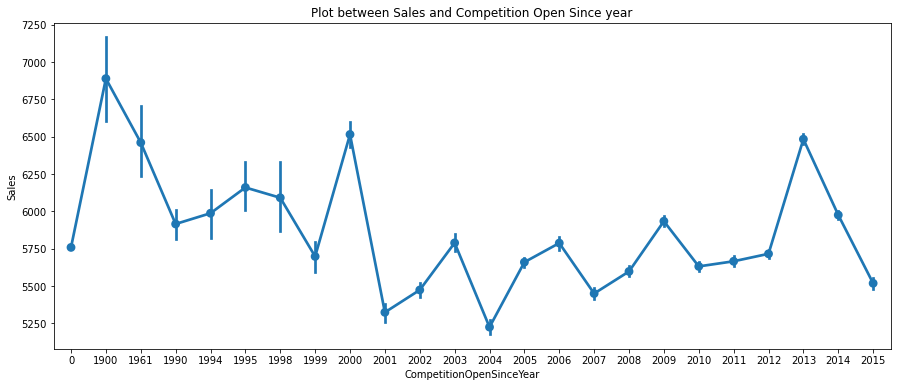

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_dataset)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

To understand the average sales for each year since another competitor opened near the store 

##### 2. What is/are the insight(s) found from the chart?

From this point plot we can tell that Sales are high during the year 1900, as there are very few store were operated, so there is less competition and sales are high. But as year passes, number of stores increased that means competition also increased and this leads to decrease in the sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since almost every subsequent year reports sudden drop/rise in the sales, owners need to work on their stockings and marketing tactics. The  reason for this change could be explored more deeply and a good decision to be make for the better performance of sales.

## Chart - 9: SchoolHoliday vs Sales

Text(0.5, 1.0, 'Boxplot For Sales Values')

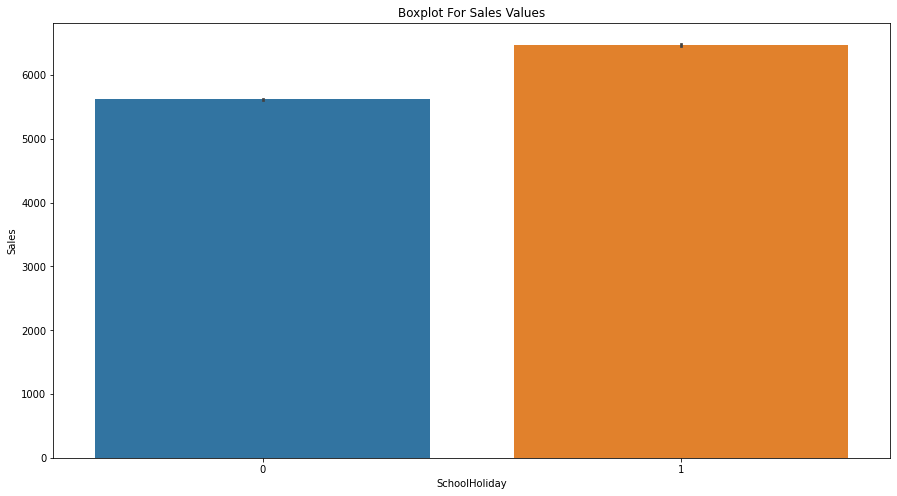

In [ ]:

plt.figure(figsize=(15,8))
plot_SchoolHoliday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final_dataset)
plt.title('Boxplot For Sales Values')

##### 1. Why did you pick the specific chart?

To know the count of how many sales were made at stores on school holiday and on non-school holiday

##### 2. What is/are the insight(s) found from the chart?

From this bar plot we can see there is no diffrece in sales,but sales are more on school holidays . It is possible that school holidays are more likely to be associated with families going on vacation or parents taking time off work to spend with their children, which could lead to increase in consumer spendings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from the graph, it is not making much difference whether there is school holiday or not. Still, businesses can target school holidays and run more promotional offers.

## Chart - 10: Understanding promoInterval on Stores

In [ ]:
final_dataset.PromoInterval.value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

<AxesSubplot:ylabel='PromoInterval'>

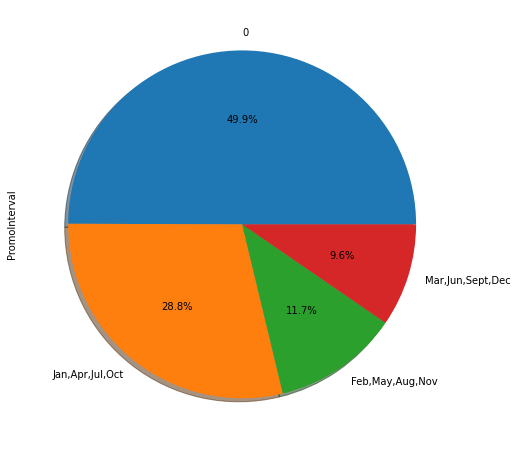

In [ ]:
plt.figure(figsize=(10,8))
final_dataset.PromoInterval.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)


##### 1. Why did you pick the specific chart?

To understand the promotion interval i.e. when the store is partcipating or not.

##### 2. What is/are the insight(s) found from the chart?

As we found from this pie plot there is maximum promotion occurs on jan,apr,jul,oct in this month and there is average 50% stores are not participating for promotion and lowest promotion occurs in mar,jun,sept,dec.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So from this we can understand which month are crucial for promotion and which month are not. So according to that we can make decision for our sales.

## Chart - 11: CompetitionDistance vs Sales

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

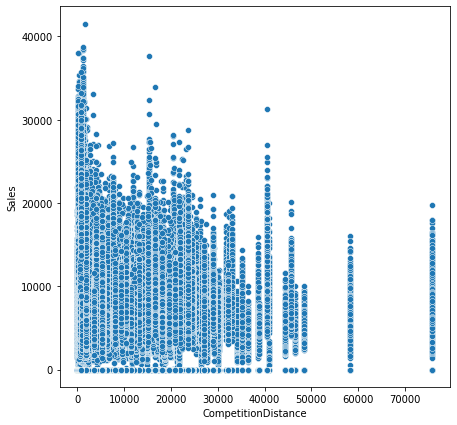

In [ ]:

plt.figure(figsize=(7,7))
sns.scatterplot(final_dataset['CompetitionDistance'],final_dataset['Sales'])

##### 1. Why did you pick the specific chart?

To understand relationship between Cometition distance vs Sales

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot we observed that mostly the competitor stores weren't that far from each other and the stores are located near each other saw more sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see sales are more for closely located stores and stores can continue providing exciting offers and services to attract customers to compete the market.

## Chart - 12 : Correlation Heatmap

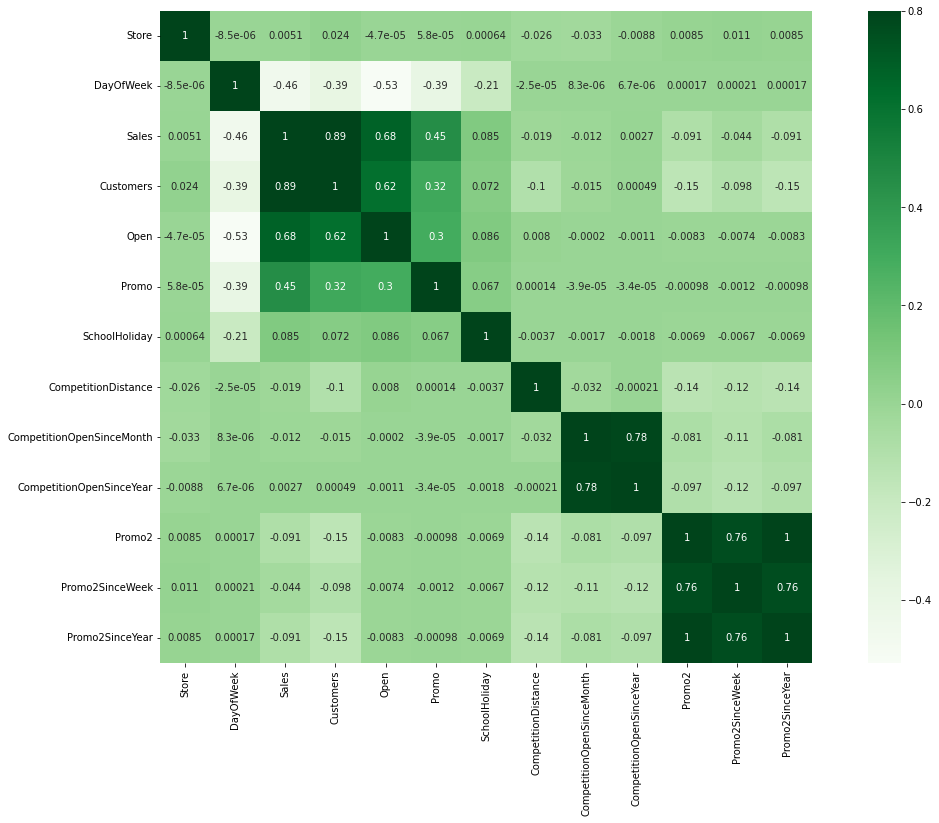

In [ ]:
# Correlation Heatmap visualization code
corr_data = final_dataset.corr()
h, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_data, vmax=.8, square=True , cmap="Greens",annot=True);

##### 1. Why did you pick the specific chart?

To understand relationship between each features.

##### 2. What is/are the insight(s) found from the chart?

from this heatmap we can say:

*   Store and Sales are almost negligible correlated
*   DayofWeek and Sales are negatively(-0.46) correlated
*   Customers and Sales are positively (0.89) correlated.
*   Promo and Sales are positively (0.45) correlated.
*   Open and Sales are positively(0.68) correlated
*   All the other features are negligibly correlated with Sales







## Chart - 13 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(final_dataset)

NameError: ignored

##### 1. Why did you pick the specific chart?

From this pair plot we can understand multiple relationship between diffrent features in a single frame and various insights related to the data can be gained in one single look.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between sales and other variables, such as customers, Promotions, competition, and school holidays Columns.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
final_dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the null and duplicate values by isnull(),dupicated() and then replaced the null values of various variables with 0 .

### 2. Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1805982310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18059828b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1805982040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1805982e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f180598c160>],
 'means': []}

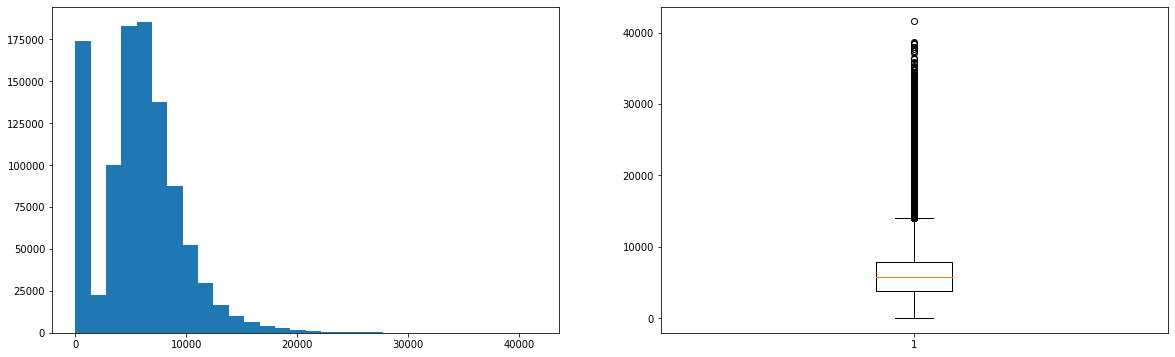

In [ ]:
# Handling Outliers & Outlier treatments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(final_dataset['Sales'], bins=30)
ax2.boxplot(final_dataset['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

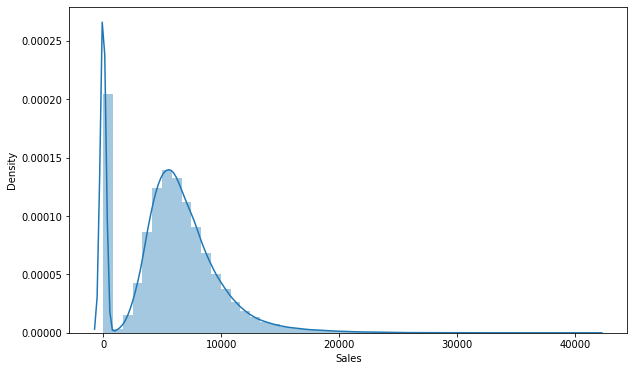

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(final_dataset['Sales'])

Removing Outliers Of Sales Column

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_outlier = q1 - (1.5 * iqr)
    upper_outlier = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_outlier or x > upper_outlier]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_outlier else q3 if x > upper_outlier else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  final_dataset[feature]= treat_outliers_iqr(final_dataset[feature])

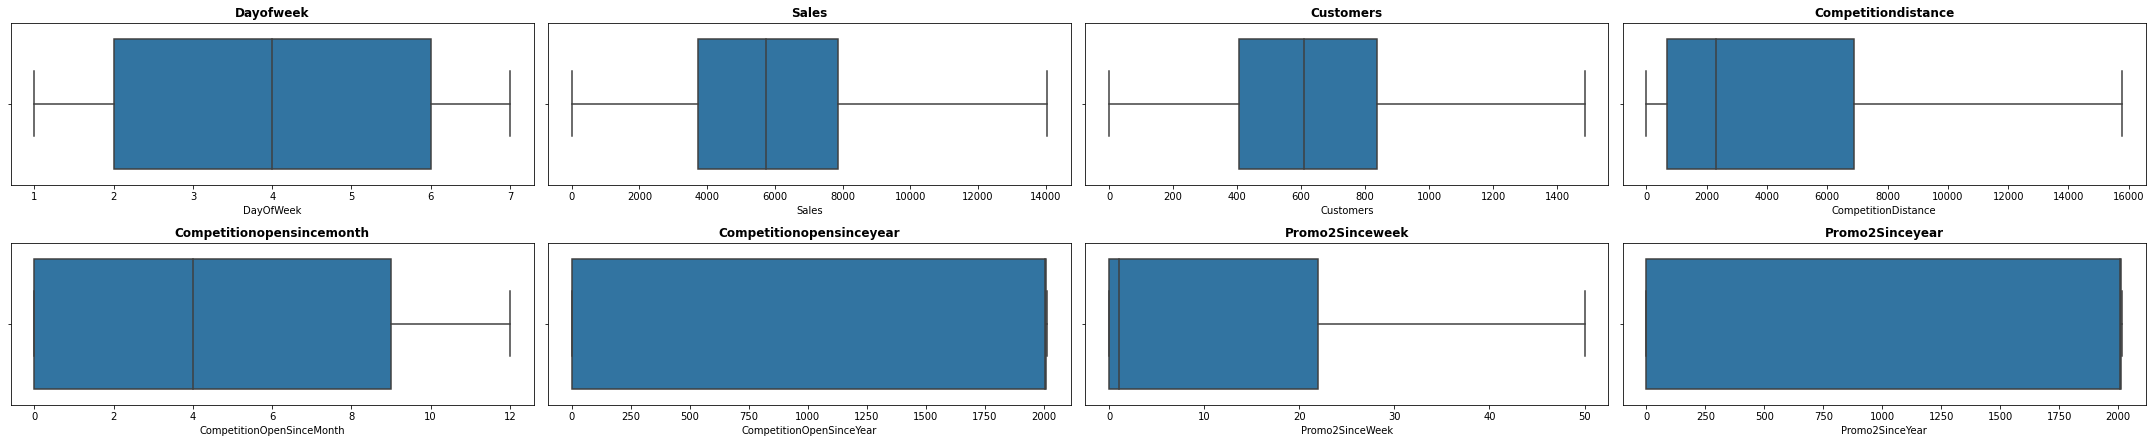

In [ ]:
#Replotting the box plots and checking outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(final_dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We can see from above Box plot there is no outliers so by using tenchniques like inter quartile range.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]


# checking the unique counts of object dype column which is essential to determine the type of encoding to use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {final_dataset[unique].unique()}")
  print(f"Total number of unique values are: {final_dataset[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# replacing "0" to 0 and a,b,c=1 for our simplicity as they resembles that there is holiday
final_dataset["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)


for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {final_dataset[unique].unique()}")
  print(f"Total number of unique values are: {final_dataset[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [ ]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
final_dataset_1=final_dataset.copy()

In [ ]:
# Encode your categorical columns by dropping the first category
final_dataset_1= pd.get_dummies(final_dataset, dtype=int, drop_first=True)

In [ ]:
final_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
final_dataset_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Extracting date, month and year from Date feature
final_dataset_1["Day"]= final_dataset_1["Date"].dt.day
final_dataset_1["Month"]= final_dataset_1["Date"].dt.month
final_dataset_1["Year"]= final_dataset_1["Date"].dt.year
final_dataset_1["Week"]= final_dataset_1["Date"].dt.week

In [ ]:
final_dataset_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,...,0,0,0,0,0,0,31,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,...,0,0,0,0,0,0,30,7,2015,31
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,...,0,0,0,0,0,0,29,7,2015,31
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,...,0,0,0,0,0,0,28,7,2015,31
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,...,0,0,0,0,0,0,27,7,2015,31


#### 2. Feature Selection

<AxesSubplot:>

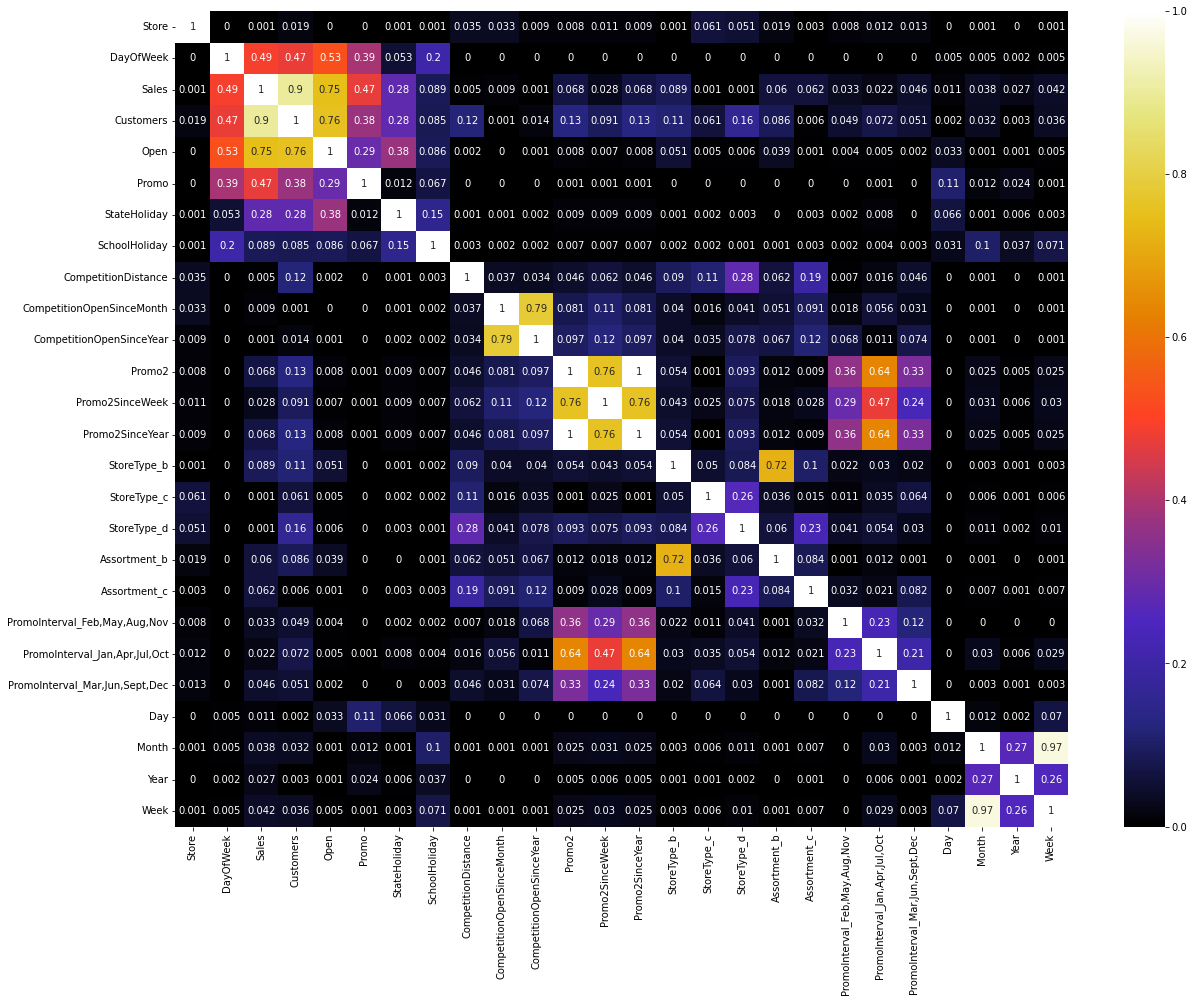

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(final_dataset_1.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following correlations:
 
*   Positive Corelation- Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.

*   Negative Corelation- DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration.
*   No Corelation- Store, StoreType_c, StoreType_d

##### Which all features you found important and why?

We have selected
 "DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration" as our final important features as they are highly correlated with the target variable (Sales)

### 3: Feature Engineering

In [ ]:
final_dataset_1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Day', 'Month', 'Year', 'Week'],
      dtype='object')

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek']

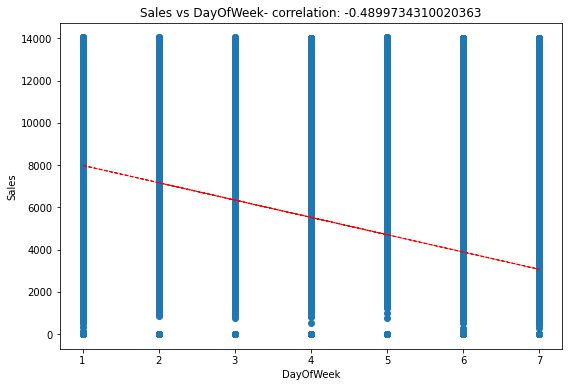

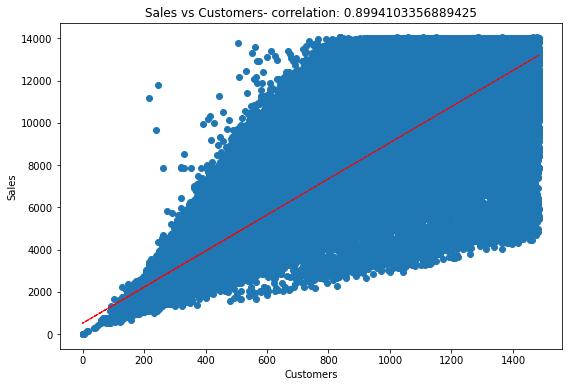

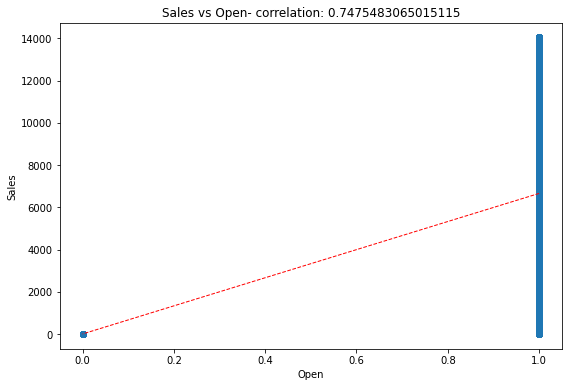

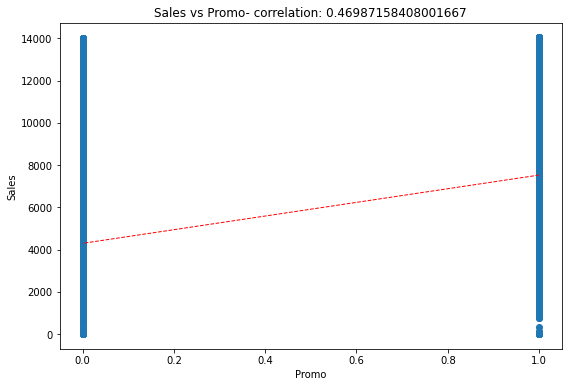

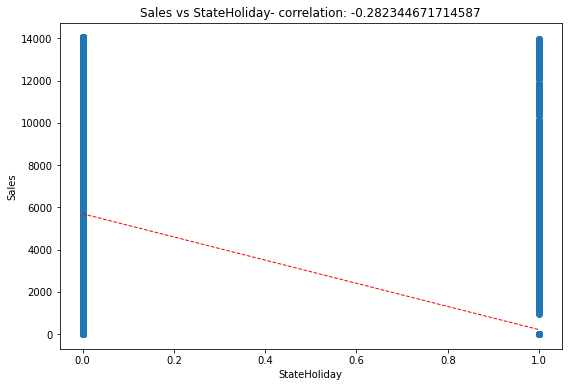

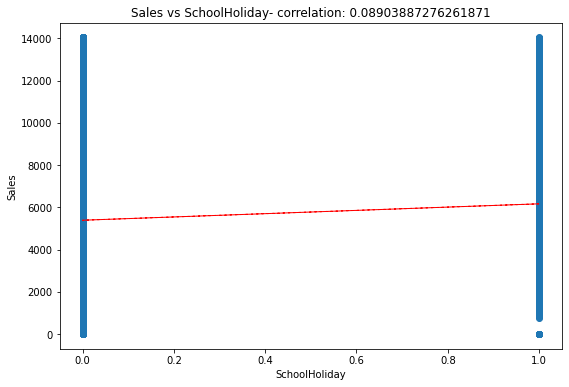

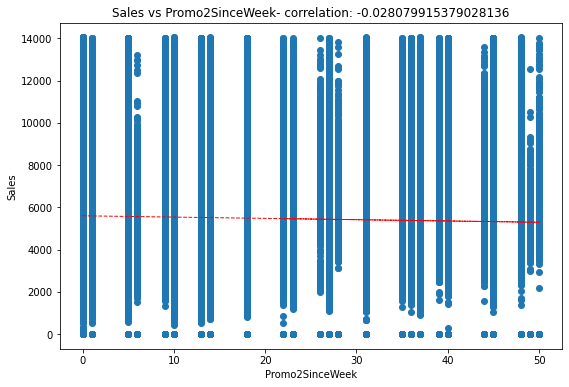

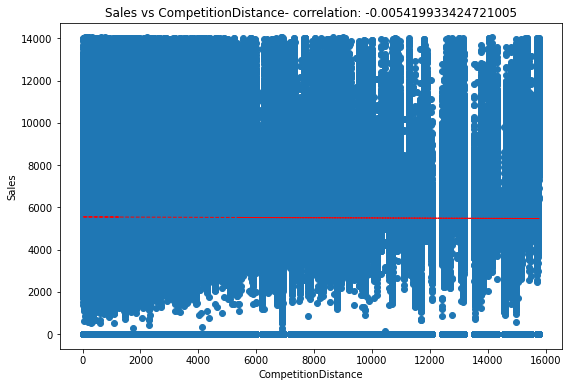

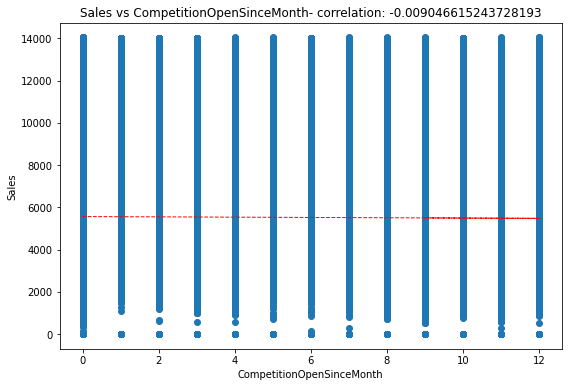

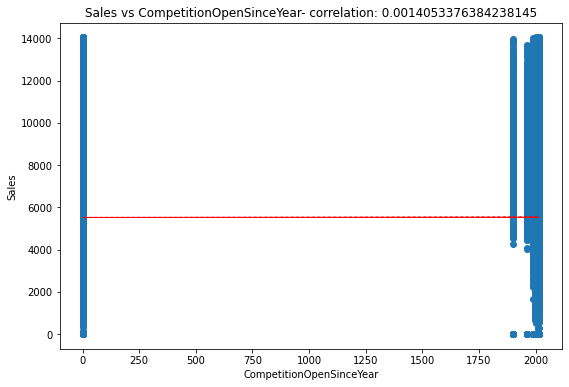

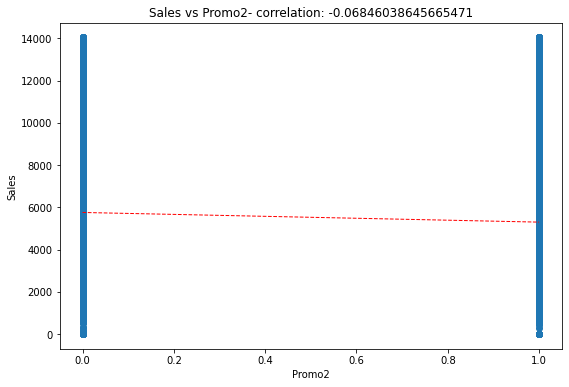

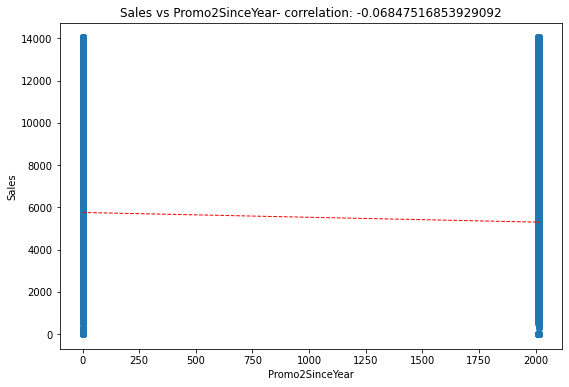

In [ ]:
for col in numeric_features[0:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = final_dataset_1[col]
  label = final_dataset_1['Sales']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(final_dataset_1[col], final_dataset_1['Sales'], 1)
  y_hat = np.poly1d(z)(final_dataset_1[col])

  plt.plot(final_dataset_1[col], y_hat, "r--", lw=1)

plt.show()

### 4. Data Scaling

Before scaling our data let's just seperate our "x" and "y" variables as we do not have to scale our y variable (Target variable).

In [ ]:
# Separating "x" and "y" variables
x= final_dataset_1[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day"]]
y= final_dataset_1[['Sales']]
print(x.shape)
print(y.shape)

(1017209, 14)
(1017209, 1)


In [ ]:
# Scaling your data
# Importing MinMaxScaler library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creating object
MinMax_regressor= MinMaxScaler()

In [ ]:
# Fit and Transform
x= MinMax_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used MinMaxScaler of sklearn library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence and it's huge data also.

The main reason to use MinMaxScaler is to ensure that all features have the same scale and range of values, which can improve the performance of certain machine learning algorithms. Some of the common reasons to use MinMaxScaler are:

### Scaling: MinMaxScaler scales the data to a specific range (usually 0 to 1) to avoid bias in favor of features with higher magnitudes.

### Outliers: MinMaxScaler is robust to outliers, meaning that it scales the data to the range of values specified, regardless of the presence of outliers.

### Interpretability: MinMaxScaler preserves the interpretability of the data by maintaining the original scale of the features.

### Speed: MinMaxScaler is a simple and fast technique that can be applied to large datasets with many features.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((813767, 14), (203442, 14), (813767, 1), (203442, 1))

##### What data splitting ratio have you used and why? 

Since our dataset is huge and have nearly 10lakh obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

## ***7. ML Model Implementation***

In [ ]:
final_dataset_1.shape

(1017209, 27)

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)
  print("\n")

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)
  print("\n")

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("\n")

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")
  print("\n")

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 score on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 score on test is:" ,R2_test)



### ML Model - 1: Linear Regression

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict on the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

array([[ -353.75055074, 11962.59412876,   936.04246254,  -836.25720486,
           63.1452937 ,   820.97269999,   286.69946413,   301.50993056,
         -139.87162312,   800.56110546,   222.37528629,  -120.06902102,
         -241.21116689,    33.31298839]])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

array([-17.87342385])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculation of evaluation Metric Score
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

MAE on train is: 873.9951570908181
MAE on test is: 873.264592375563


MSE on train is: 1603352.221011557
MSE on test is: 1592716.4269948362


RMSE on train is: 1266.2354524382727
RMSE on test is: 1262.028694996606


MAPE on train is: 3.6399530885729624e+19  %
MAPE on test is: 3.6309637544985477e+19  %


R2 score on train is: 0.8568716891728215
R2 score on test is: 0.8572304412849617


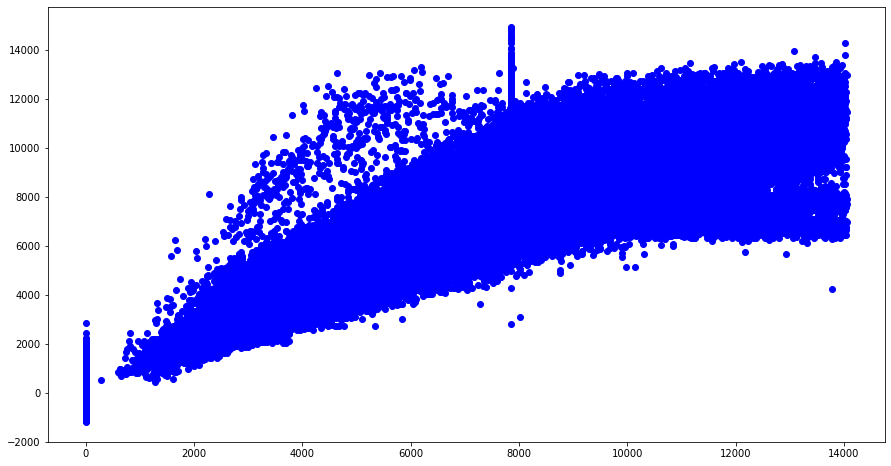

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_regression_pred, c="blue")

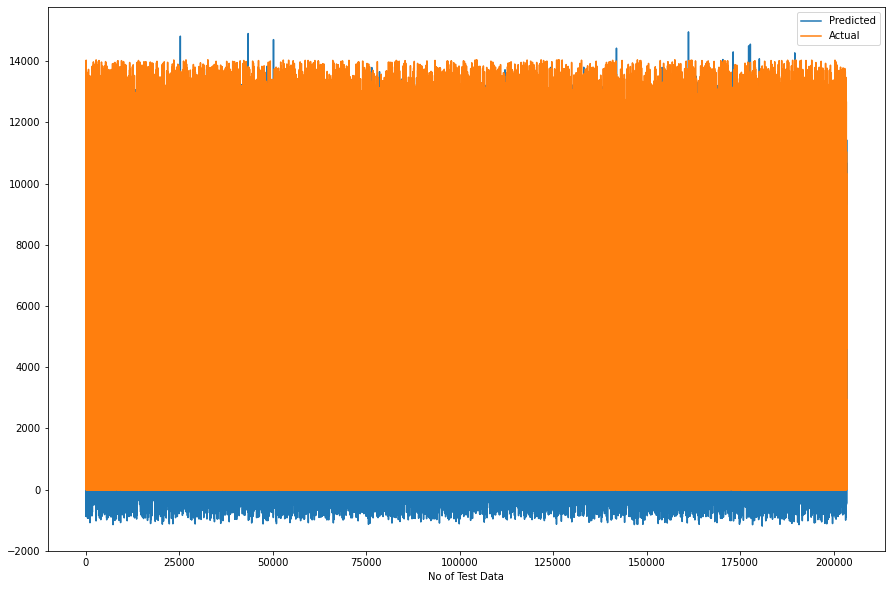

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_test_regression_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

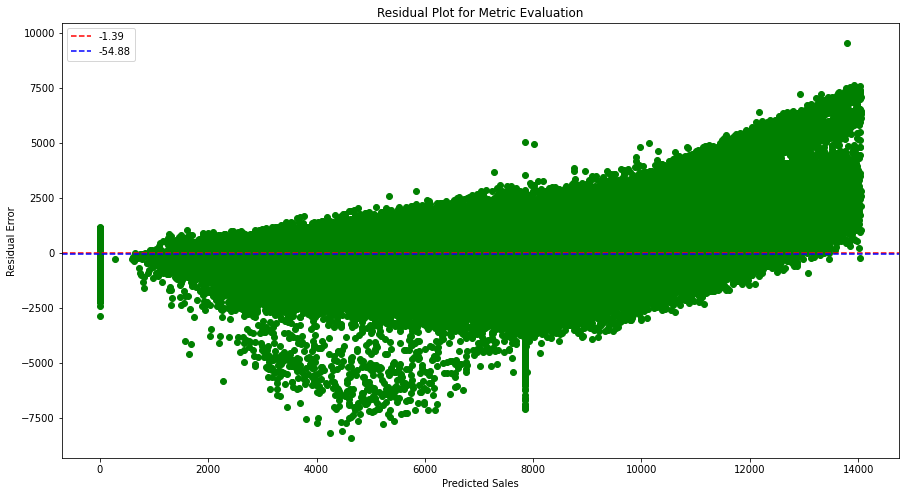

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="green")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals), color='blue', linestyle='--', label=Median)
plt.legend()

plt.show()

Text(0.5, 0.98, 'Residual Analysis')

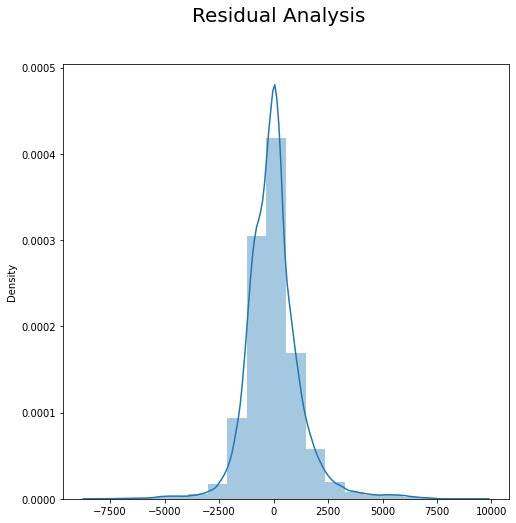

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(y_test- y_test_regression_pred,bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

Text(0, 0.5, 'residuals')

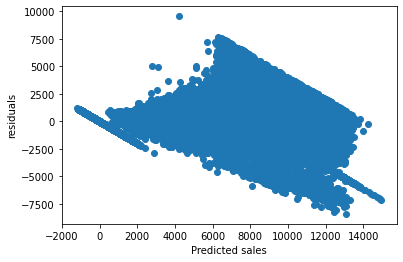

In [ ]:
### Heteroscadacity
plt.scatter(y_test_regression_pred, y_test-y_test_regression_pred)
plt.xlabel('Predicted sales')
plt.ylabel('residuals')

We have applied most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metrics on both the train and test datesets so that we can conclude our ML model. Here form this plot, we can observe that both the r2 scores are very close which explains that on test dataset and our model is on the correct way.

#### 2. Cross- Validation & Hyperparameter Tuning

for Ridge Regression

In [ ]:
# importing ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 1}
Negative mean square error is: -1603428.2368787797


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

MAE on train is: 873.9951971535559
MAE on test is: 873.2646420560994


MSE on train is: 1603352.2210732822
MSE on test is: 1592716.484490687


RMSE on train is: 1266.2354524626462
RMSE on test is: 1262.0287177757434


MAPE on train is: 3.6399529311005483e+19  %
MAPE on test is: 3.6309634282040754e+19  %


R2 score on train is: 0.8568716891673114
R2 score on test is: 0.8572304361310894


For Lasso Regression

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.0001, 'max_iter': 10}
Negative mean square error is: -1603410.2935552667


In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MAE on train is: 873.9932488975372
MAE on test is: 873.2626179787454


MSE on train is: 1603352.224014819
MSE on test is: 1592715.8324430548


RMSE on train is: 1266.2354536241744
RMSE on test is: 1262.028459442597


MAPE on train is: 3.6400035952559014e+19  %
MAPE on test is: 3.631017027267962e+19  %


R2 score on train is: 0.8568716889047259
R2 score on test is: 0.8572304945800079


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values, also it calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well

### ML Model - 2: Random Forest Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
# create a regressor object
RandomForest_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18)

In [ ]:
# fit the regressor with X and Y data
RandomForest_TreeR.fit(x_train, y_train)

In [ ]:
# predicting  the model
y_train_RFtree_pred= RandomForest_TreeR.predict(x_train)
y_test_RFtree_pred= RandomForest_TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_RFtree_pred, c="blue")

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RandomForest = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RandomForest),2)
Median= round(np.median(residuals_RandomForest),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_RandomForest, c="green")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RandomForest), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RandomForest), color='black', linestyle='--', label=Median)
plt.legend()

plt.show()

From our secomd model i.e Random Forest we have achieved the r2 score of 0.97 on training and 0.95 on test dataset and and that means our model is moving towards optimal model.

We got the Mean=0.06 and Median=0.0 this shows that as our accuracy increases, our mean and median are nearly at 0 that means residual error are less.
In order to get the higher accuracy let's perform hyperparameter tuning for the same model and see if we are getting significant results.

#### 2. Cross- Validation & Hyperparameter Tuning

 ML Model - 2 Implementing with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RandomForest_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RandomForest_treeR = RandomizedSearchCV(RandomForest_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RandomForest_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RandomForest_treeR.predict(x_train)
y_test_grid_RFtree_pred = RandomForest_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RandomForest_treeR.best_params_}")
print(f"Negative mean square error is: {RandomForest_treeR.best_score_}")

In [ ]:
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

MAE(Mean Absolute Error): This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

RMSE(Root Mean Squared Error): It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.



# **Conclusion**

Exploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:


1.   We saw from Sales vs Frequency density distribution graph that many stores are located in perfectly and also the sales are average and yes to sustain in the market we should be competitive.

1.   From Customer vs frequency distribution graph on customer we found that there is postive response from customer as the data showinng average customers are 1000. so we understand to be more profit we have to take some hard decision to improve our customer.

1.   From this plot between Sales and dayofweek,we understand that sales are high on opening days but gradually decreasing and shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on saturday and sales on Sunday is almost near to Zero as on sunday maximum stores are closed
2.   From this bar plot between open Vs sales,we understands when stores are closed there is no sales but when store's are open it's high in sales.


2.   From this bar plot between Assortment vs Sales, we understands: Store type a has a and c type assortment, Store type b has a and b type assortment, Store type c has a and c type assortment, Store type d has a and c type assortment. Assortment type a is sold more which means their demand is high followed by type c, b has the least sales which might mean they are high quality product and also they are available only in store type b.


2.   This scatter plot between Customers vs Sales shows a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows in a linearly trend between customers and sales.


1.   From this barplot between promo vs sales gives us there is promotion occurs for sales to be incresing but in promo2 vs sales there is no promotion occurs

1.  From this point plot between CompetitionOpenSinceYear vs Sales, we can tell that Sales are high during the year 1900, as there are very few store were operated, so there is less competition and sales are high. But as year passes, number of stores increased that means competition also increased and this leads to decrease in the sales
2.   From this bar plot between SchoolHoliday vs Sales, we can see there is no diffrece in sales,but sales are more on school holidays . It is possible that school holidays are more likely to be associated with families going on vacation or parents taking time off work to spend with their children, which could lead to increase in consumer spendings.


2.   As we found from this pie plot there is maximum promotion occurs on jan,apr,jul,oct in this month and there is average 50% stores are not participating for promotion and lowest promotion occurs in mar,jun,sept,dec.


###   From this heatmap we can say:

1.  **Store and Sales are almost negligible correlated**
2.   **DayofWeek and Sales are negatively(-0.46) correlated**


1.   Customers and Sales are positively (0.89) correlated.
2.  Promo and Sales are positively (0.45) correlated.


1.  Open and Sales are positively(0.68) correlated
2.   All the other features are negligibly correlated with Sales

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters  and crossvalidations also in  order to minimize the errors and drawn following conclusions:


*   In Linear Regression we got the accuracy of 85% and  even after using regularization techniques that means our data has same accuracy of 85% and it is not perfectly linearly dependent with target variable(Sales).
*  Despite using Lasso, Ridge models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well.



*   In Random Forest Regression we got the accuracy of 95% and  even after using regularization techniques that means our data has same accuracy of 95% and it is perfectly linearly dependent with target variable(Sales).
*  by using crossvalidation techniques also we got same accuracy that means our data is perfectly linearly indepent in this model.




















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***